In [0]:
import torch
import numpy as np

In [0]:
 # Torchvision contains some utilities for wroking with images
 import torchvision
 from torchvision.datasets import MNIST

In [6]:
dataset = MNIST(root='sample_data',download=True)

Extracting sample_data/MNIST/raw/train-images-idx3-ubyte.gz to sample_data/MNIST/raw


Extracting sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to sample_data/MNIST/raw


Extracting sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/MNIST/raw


Extracting sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/MNIST/raw
Processing...



Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [7]:
len(dataset)

60000

In [8]:
test_dataset = MNIST(root='sample_data/',train=False)
len(test_dataset)

10000

In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF542E32518>, 5)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 2


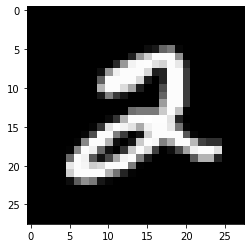

In [16]:
image,label = dataset[5]
plt.imshow(image,cmap='gray')
print('Label:',label)

In [0]:
import torchvision.transforms as transforms

In [0]:
dataset = MNIST(root='sample_data',download=True,transform=transforms.ToTensor())

In [20]:
img_tensor, label = dataset[0]
print('shape:',img_tensor.shape)

shape: torch.Size([1, 28, 28])


In [21]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


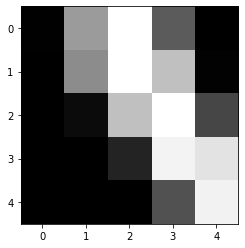

In [22]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray') #imgshow either expect channel index at last of the dimension or no channel dimension at all

### Training, Validation, Testing Sets

In [0]:
def split_indices(n,val_pct):
  # Determing size of validaton set
  n_val = int(val_pct*n)
  # Create Random permutations of 0 to n-1
  idxs = np.random.permutation(n)
  # Pick first n_val indices for validation set
  return idxs[n_val:],idxs[:n_val]

In [0]:
train_indicies, val_indicies = split_indices(len(dataset),val_pct=0.2)

In [0]:
#SubsetRandomSampler - samples elements randomly from a given list of indicies, while creating batches of data 
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size = 100

#Training sampler and dataloader
train_sampler = SubsetRandomSampler(train_indicies)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

#Validation smapler and dataloader
val_sampler = SubsetRandomSampler(val_indicies)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

## Model

In [0]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

In [0]:
model = nn.Linear(input_size,num_classes)

In [0]:
class MnistModel(nn.Module):
  def __init__(self,input_size,num_classes):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)
  
  def forward(self,xb):
    xb = xb.reshape(-1,784) #-1 for dynamic batch size
    import torch.nn.functional as F
    out = self.linear(xb)
    out = F.softmax(out,dim=1)
    return out

In [0]:
model = MnistModel(input_size,num_classes)

In [36]:
model.linear.weight

Parameter containing:
tensor([[-0.0033,  0.0196, -0.0051,  ..., -0.0297,  0.0217,  0.0253],
        [ 0.0216,  0.0270,  0.0099,  ...,  0.0196,  0.0058,  0.0284],
        [-0.0109,  0.0271, -0.0235,  ..., -0.0123,  0.0079, -0.0258],
        ...,
        [ 0.0325,  0.0007, -0.0308,  ..., -0.0112,  0.0082, -0.0225],
        [ 0.0223, -0.0322,  0.0216,  ...,  0.0350, -0.0265, -0.0166],
        [ 0.0280, -0.0086, -0.0102,  ...,  0.0227, -0.0113,  0.0110]],
       requires_grad=True)

In [37]:
model.linear.bias

Parameter containing:
tensor([-0.0165, -0.0096, -0.0091,  0.0131,  0.0356,  0.0249,  0.0321, -0.0283,
         0.0095,  0.0111], requires_grad=True)

In [41]:
list(model.parameters()) #No need to refer interion model with in class with parameters function. It automatically get all the nested models 

[Parameter containing:
 tensor([[-0.0033,  0.0196, -0.0051,  ..., -0.0297,  0.0217,  0.0253],
         [ 0.0216,  0.0270,  0.0099,  ...,  0.0196,  0.0058,  0.0284],
         [-0.0109,  0.0271, -0.0235,  ..., -0.0123,  0.0079, -0.0258],
         ...,
         [ 0.0325,  0.0007, -0.0308,  ..., -0.0112,  0.0082, -0.0225],
         [ 0.0223, -0.0322,  0.0216,  ...,  0.0350, -0.0265, -0.0166],
         [ 0.0280, -0.0086, -0.0102,  ...,  0.0227, -0.0113,  0.0110]],
        requires_grad=True), Parameter containing:
 tensor([-0.0165, -0.0096, -0.0091,  0.0131,  0.0356,  0.0249,  0.0321, -0.0283,
          0.0095,  0.0111], requires_grad=True)]

### Evaluation Metric and Loss Fucntion

In [0]:
#Evaluation Metric not Loss function
def accuracy(output,labels):
  _, preds = torch.max(output,dim=1)
  return torch.sum(preds == labels).item()/len(preds)

In [0]:
import torch.nn.functional as F
loss_fn = F.cross_entropy

### Optimizer

In [0]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

### Training Model

In [0]:
def loss_batch(model,loss_fn,xb,yb,opt=None,metric=None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  metric_result = None
  
  if metric is not None:
    metric_result = metric(preds,yb)
  
  return loss.item(),len(xb),metric_result

In [0]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    #Pass each batch through the model
    results = [loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
    #Seperate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    #Total size of the dataset
    total = np.sum(nums)
    #Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses,nums))/total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics,nums))/total
  return avg_loss, total, avg_metric

In [61]:
print(evaluate(model,loss_fn,val_loader,metric=accuracy))

(2.3014162798722584, 12000, 0.09891666666666667)


In [0]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(epochs):
    #Training
    for xb,yb in train_dl:
      loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
    #Evaluation
    result = evaluate(model,loss_fn,valid_dl,metric)
    val_loss, total, val_metric = result
    #Print progress
    if metric is None:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [66]:
fit(10,model,loss_fn,optimizer,train_loader,val_loader,accuracy)

Epoch [1/10], Loss: 1.7317, accuracy: 0.8029
Epoch [2/10], Loss: 1.7256, accuracy: 0.8038
Epoch [3/10], Loss: 1.7203, accuracy: 0.8051
Epoch [4/10], Loss: 1.7157, accuracy: 0.8071
Epoch [5/10], Loss: 1.7116, accuracy: 0.8086
Epoch [6/10], Loss: 1.7078, accuracy: 0.8100
Epoch [7/10], Loss: 1.7045, accuracy: 0.8117
Epoch [8/10], Loss: 1.7015, accuracy: 0.8124
Epoch [9/10], Loss: 1.6987, accuracy: 0.8135
Epoch [10/10], Loss: 1.6962, accuracy: 0.8143


In [0]:
testDataset = MNIST(root='sample_data',download= True,train=False,transform=transforms.ToTensor())

In [0]:
i = 6

In [89]:
_,pred = torch.max(model(testDataset[i][0]),dim=1)
pred.item()

4

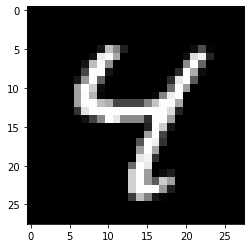

In [90]:
plt.imshow(testDataset[i][0][0,:,:],cmap='gray')